In [1]:
#standard library load

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl

import xgboost as xgb

from sklearn.grid_search import GridSearchCV

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold

from sklearn import preprocessing

import operator
from matplotlib import pylab as plt

#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

/home/gilles/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/gilles/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# V1.4

### Load Training and Test data

### Remove the no info columns to simplify the input dat

### Based on V1.3 outliers removed

In [31]:
# Load pr0cessed benchmark data and test data
df = pd.read_csv("Data/V1.1.transformed_application_train.csv")
df2 = pd.read_csv("Data/V1.transformed_application_test.csv")


In [32]:
import matplotlib.pyplot as plt

%matplotlib inline


fig=plt.figure(figsize=(17,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b90e4e48>]], dtype=object)

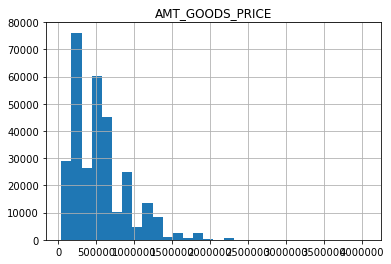

In [33]:
df.hist(column='AMT_GOODS_PRICE', bins=30)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b8f93080>]], dtype=object)

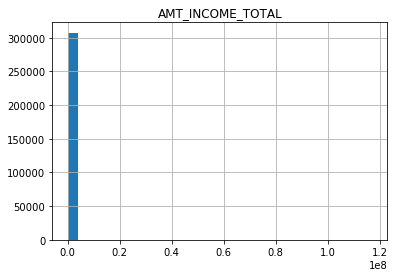

In [35]:
df.hist(column='AMT_INCOME_TOTAL', bins=30)

In [42]:
type(df["AMT_INCOME_TOTAL"][0])

numpy.float64

In [36]:
df["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b8f5cbe0>]], dtype=object)

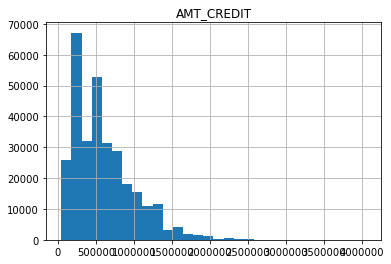

In [37]:
df.hist(column='AMT_CREDIT', bins=30)

In [38]:
df["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b8dbe518>]], dtype=object)

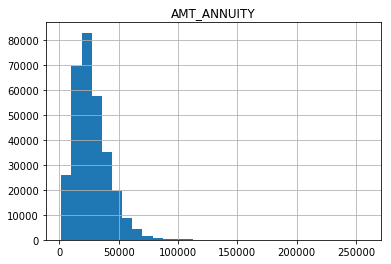

In [39]:
df.hist(column='AMT_ANNUITY', bins=30)

In [10]:
df["AMT_ANNUITY"].describe()

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b95c1f60>]], dtype=object)

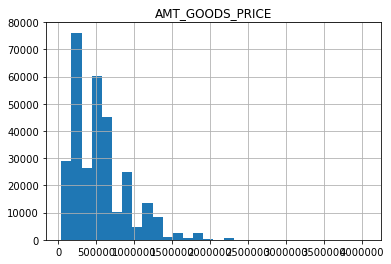

In [11]:
df.hist(column='AMT_GOODS_PRICE', bins=30)

In [43]:
df["AMT_GOODS_PRICE"].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [44]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,1,0,0,1,0,2.007889,0.121978,1.733333
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,1,0,0,4.790750,0.132217,4.183333
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,1,0,0,1,0,2.000000,0.100000,2.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,1,0,0,1,0,2.316167,0.219900,2.200000
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,1,0,0,1,0,4.222222,0.179963,4.222222


In [45]:
print(df.shape)

(307511, 308)


In [46]:
#remove all the columns with INFO to see if the simplification provides better results

allFields = df.columns
print(df.shape)
for i in allFields:
    if ("_INFO") in i:
        df = df.drop(i, axis=1)
        df2 = df2.drop(i, axis=1)
print(df.shape)      

(307511, 308)
(307511, 253)


## Mark entries for outliers

In [47]:
print(len(df))

307511


In [48]:
before_cleaning = df["TARGET"].sum()

In [49]:
#print(df["AMT_INCOME_TOTAL"].mean())
#print(df["AMT_INCOME_TOTAL"].std())
#print(df["AMT_INCOME_TOTAL"].max())
#print(df["AMT_INCOME_TOTAL"].min())
#print(df["AMT_INCOME_TOTAL"].median())

for to_clean in ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]:

    threshold = df[to_clean].mean()+ 2.5*df[to_clean].std()
    df= df[(df[to_clean]<=threshold) | (df["TARGET"]==1)]

print(len(df))

288140


In [50]:
after_cleaning = df["TARGET"].sum()

In [51]:
print(before_cleaning)
print(after_cleaning)
print("before ratio", before_cleaning/307511)
print("after ratio", after_cleaning/len(df))

24825
24825
before ratio 0.08072881945686496
after ratio 0.08615603526063718


In [52]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,1,0,0,1,0,2.007889,0.121978,1.733333
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,1,0,0,4.790750,0.132217,4.183333
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,1,0,0,1,0,2.000000,0.100000,2.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,1,0,0,1,0,2.316167,0.219900,2.200000
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,1,0,0,1,0,4.222222,0.179963,4.222222


In [53]:
df2.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,1,0,0,1,0,4.213333,0.152300,3.333333
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,1,0,0,1,0,2.250182,0.175455,1.818182
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,1,0,0,1,0,3.275378,0.344578,3.111111
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,1,0,0,1,0,5.000000,0.155614,5.000000
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,1,0,0,1,0,3.475000,0.178150,3.475000


In [54]:
print(len(df.columns))
print(len(df2.columns)+1)

253
253


# USE XGB...

In [55]:
df = df.sample(frac=1).reset_index(drop=True)

In [56]:
y_train = df["TARGET"].values

In [57]:
if "TARGET" in list(df):
    df = df.drop("TARGET", axis=1)

In [58]:
if "SK_ID_CURR" in list(df):
    df = df.drop("SK_ID_CURR", axis=1)

In [59]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,0,90000.0,239850.0,23850.0,225000.0,0.009175,-18692,-4355,-10923.0,-2251,...,0,0,1,0,0,1,0,2.665000,0.265000,2.500000
1,0,108000.0,382500.0,25875.0,382500.0,0.035792,-14348,-1037,-3702.0,-4950,...,0,0,1,0,0,1,0,3.541667,0.239583,3.541667
2,0,171000.0,517500.0,22923.0,517500.0,0.011657,-22116,365243,-5918.0,-4272,...,0,1,0,0,1,0,0,3.026316,0.134053,3.026316
3,0,180000.0,315666.0,24556.5,292500.0,0.009175,-21917,-402,-8821.0,-4910,...,0,0,1,0,0,1,0,1.753700,0.136425,1.625000
4,1,315000.0,1024740.0,52452.0,900000.0,0.020713,-11262,-238,-1712.0,-2292,...,0,0,0,1,1,0,0,3.253143,0.166514,2.857143


In [60]:
x_train = df

In [61]:
x_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,0,90000.0,239850.0,23850.0,225000.0,0.009175,-18692,-4355,-10923.0,-2251,...,0,0,1,0,0,1,0,2.665000,0.265000,2.500000
1,0,108000.0,382500.0,25875.0,382500.0,0.035792,-14348,-1037,-3702.0,-4950,...,0,0,1,0,0,1,0,3.541667,0.239583,3.541667
2,0,171000.0,517500.0,22923.0,517500.0,0.011657,-22116,365243,-5918.0,-4272,...,0,1,0,0,1,0,0,3.026316,0.134053,3.026316
3,0,180000.0,315666.0,24556.5,292500.0,0.009175,-21917,-402,-8821.0,-4910,...,0,0,1,0,0,1,0,1.753700,0.136425,1.625000
4,1,315000.0,1024740.0,52452.0,900000.0,0.020713,-11262,-238,-1712.0,-2292,...,0,0,0,1,1,0,0,3.253143,0.166514,2.857143


In [62]:
if "SK_ID_CURR" in list(df2):
    df2 = df2.drop("SK_ID_CURR", axis=1)

In [63]:
x_predict = df2

In [64]:
x_predict.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,...,0,0,1,0,0,1,0,4.213333,0.152300,3.333333
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,...,0,0,1,0,0,1,0,2.250182,0.175455,1.818182
2,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,...,0,0,1,0,0,1,0,3.275378,0.344578,3.111111
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,...,0,0,1,0,0,1,0,5.000000,0.155614,5.000000
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,...,0,0,1,0,0,1,0,3.475000,0.178150,3.475000


In [65]:
print(x_train.shape, y_train.shape, x_predict.shape)

(288140, 251) (288140,) (48744, 251)


In [66]:
d_train = xgb.DMatrix(x_train, label=y_train)

In [67]:
xgb_params = {
        'eta': 0.05,
        'max_depth': 5,
        'subsample': 0.9,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'lambda': 1.5,
        'silent': 1,
        'colsample_bytree': 0.9
    }

## Do actual ML XGB

In [68]:
cvresult = xgb.cv(xgb_params, d_train, num_boost_round=5000, nfold=5, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)

In [69]:
clf = xgb.XGBClassifier(missing=9999999999,
                #max_depth = 7,
                #n_estimators=700,
                #learning_rate=0.1, 
                nthread=4,
                #subsample=1.0,
                #colsample_bytree=0.5,
                min_child_weight = 1,
                scale_pos_weight=1,
                reg_alpha= 0.005,
                seed=1301)
#clf.set_params(params = xgb_params)

xgb_param = clf.get_xgb_params()

In [70]:
cvresult

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.692914,0.003527,0.696786,0.002052
1,0.701984,0.005080,0.705652,0.003004
2,0.706068,0.006506,0.710072,0.004846
3,0.709136,0.006756,0.712762,0.004910
4,0.710666,0.005773,0.714250,0.002743
5,0.712847,0.005904,0.716555,0.003223
6,0.714592,0.005764,0.718486,0.003966
7,0.716478,0.004792,0.720479,0.003511
8,0.717220,0.004429,0.721117,0.003079
9,0.718109,0.004267,0.722193,0.003308


In [71]:
xgb_param

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': 9999999999,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0.005,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 1301,
 'silent': 1,
 'subsample': 1}

In [72]:
clf.set_params(n_estimators=cvresult.shape[0])


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=9999999999, n_estimators=626, nthread=4,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=1301, silent=True, subsample=1)

In [73]:
clf.fit(x_train, y_train, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]))

Overall AUC: 0.792867227075


In [74]:
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(x_predict, ntree_limit=cvresult.shape[0])

Predict the probabilities based on features in the test set


In [75]:
pred

array([[ 0.95931506,  0.04068494],
       [ 0.87390089,  0.12609909],
       [ 0.00381023,  0.99618977],
       ..., 
       [ 0.96028334,  0.03971668],
       [ 0.93726116,  0.06273884],
       [ 0.81030625,  0.18969373]], dtype=float32)

## Save the results into a submission file

In [76]:
#Load leaderboard file:

df_submit = pd.read_csv("Data/sample_submission.csv")

In [77]:
df_submit["TARGET"] = pred[:,1]
df_submit.head()

,SK_ID_CURR,TARGET
0,100001,0.040685
1,100005,0.126099
2,100013,0.996190
3,100028,0.997847
4,100038,0.138183


In [78]:
df_submit["TARGET"].describe()

count    48744.000000
mean         0.143728
std          0.239401
min          0.001086
25%          0.033123
50%          0.061516
75%          0.124875
max          1.000000
Name: TARGET, dtype: float64

In [79]:
df_submit.to_csv("Data/submission_application_test.csv", index = False)

## Scale the dataframes for Deep Learning processing

In [63]:
fieldsToProcess = list(df)

In [64]:
#remove TARGET and 'SK_ID_CURR' from the list of fields for Test data
if "TARGET" in fieldsToProcess:
    fieldsToProcess.remove("TARGET")
    print("TARGET removed")
    
if "SK_ID_CURR" in fieldsToProcess:
    fieldsToProcess.remove("SK_ID_CURR")
    print("SK_ID_CURR removed")    

TARGET removed
SK_ID_CURR removed


In [65]:
#process all the other fields

for processColumn in fieldsToProcess:
#for processColumn in ["AMT_INCOME_TOTAL","AMT_CREDIT"]:
        # 1.convert the column value of the dataframe as floats
        float_array_train = df[processColumn].values.astype(float)
        float_array_test = df2[processColumn].values.astype(float)
        
        min_max_scaler = preprocessing.MinMaxScaler()

        min_max_scaler.fit(float_array_train.reshape(-1, 1))

        scaled_array_train = min_max_scaler.transform(float_array_train.reshape(-1, 1))
        scaled_array_test  = min_max_scaler.transform(float_array_test.reshape(-1, 1))

        df[processColumn] = scaled_array_train
        df2[processColumn]= scaled_array_test

In [66]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,100002,1,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.023640,0.064910,0.020411
1,100003,0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.056483,0.070368,0.049325
2,100004,0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.023547,0.053193,0.023558
3,100006,0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.027278,0.117114,0.025918
4,100007,0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.049774,0.095823,0.049784


## save everything...

In [67]:
df.to_csv("Data/V2_normalized_train.csv")
df2.to_csv("Data/V2_normalized_test.csv")
df.head().to_csv("Data/V2_normalized_sample.csv")

# USE Deep Learning...

In [307]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

## Shuffle around the row from our data

In [317]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,100002,1,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.023640,0.064910,0.020411
1,100003,0,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.056483,0.070368,0.049325
2,100004,0,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.023547,0.053193,0.023558
3,100006,0,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.027278,0.117114,0.025918
4,100007,0,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.049774,0.095823,0.049784


In [318]:
df = df.sample(frac=1).reset_index(drop=True)

In [319]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EMERGENCYSTATE_MODE_Yes,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,COVER_AMT_CREDIT,COVER_AMT_ANNUITY,COVER_AMT_GOODS_PRICE
0,134465,0,0.000000,0.001743,0.262094,0.147561,0.225589,0.446855,0.119560,0.039582,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.056237,0.091525,0.048550
1,429608,0,0.000000,0.001127,0.057780,0.039874,0.039282,0.491595,0.108681,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.020655,0.039956,0.014791
2,237687,0,0.000000,0.000358,0.101124,0.079063,0.102132,0.257000,0.269278,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.078623,0.172755,0.078633
3,329237,0,0.105263,0.000935,0.123596,0.049754,0.124579,0.248124,0.757441,0.043411,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.047151,0.056640,0.047161
4,190062,0,0.000000,0.000935,0.155029,0.077975,0.108866,0.129705,0.538388,0.033420,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.058157,0.085216,0.041654


In [320]:
y_train = df["TARGET"].values

x_train = df.drop("TARGET", axis=1)

In [321]:
x_train = x_train.values

In [322]:
print(x_train.shape, y_train.shape)

(307511, 307) (307511,)


In [323]:
split = 240000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]

In [324]:
print(x_train.shape, y_train.shape)

(240000, 307) (240000,)


In [325]:
print(x_valid.shape, y_valid.shape)

(67511, 307) (67511,)


In [326]:
# logistic regression with L1 and L2 regularization
regl1 = regularizers.l1(0.01)
regl2 = regularizers.l2(0.01)




In [327]:
from keras.layers import Dropout

In [328]:
#class_weights = {0: 1.,1: 10.}

In [329]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [330]:
class_weights

array([ 0.54390442,  6.19418779])

In [296]:
model = Sequential()


model.add(Dense(26, 
                activation='relu', 
                input_dim=x_train.shape[1]))


model.add(Dense(16, activation='relu'))


model.add(Dense(8, activation='relu'))


model.add(Dropout(0.2))
#                ,kernel_regularizer = regularizers.l2(0.01),
#                activity_regularizer = regularizers.l1(0.01))  
         

model.add(Dense(3, 
                activation='relu'))
#              ,kernel_regularizer = regularizers.l2(0.01),
#              activity_regularizer = regularizers.l1(0.01))  

model.add(Dropout(0.2))

model.add(Dense(1, 
                activation='sigmoid'))


In [364]:
model = Sequential()


model.add(Dense(16, 
                activation='relu',kernel_initializer='normal', 
                input_dim=x_train.shape[1]))

model.add(Dropout(0.5))
#                ,kernel_regularizer = regularizers.l2(0.01),
#                activity_regularizer = regularizers.l1(0.01))  
         

model.add(Dense(8, 
                activation='relu'))
#              ,kernel_regularizer = regularizers.l2(0.01),
#              activity_regularizer = regularizers.l1(0.01))  

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

#sigmoid

In [365]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics =['mse','accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics =['accuracy'])


In [378]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_valid, y_valid))#,class_weight=class_weights)

Train on 240000 samples, validate on 67511 samples
Epoch 1/3
240000/240000 [==============================] - 29s - loss: 2.0672 - acc: 0.8683 - val_loss: 1.3017 - val_acc: 0.9192

In [379]:
results = model.evaluate(x_valid,y_valid)

67488/67511 [============================>.] - ETA: 0s 

In [385]:
1-y_train.sum()/x_train.sum()

0.99999970984432829

In [386]:
y_train.sum()

19373

In [380]:
results

[1.3016524313858167, 0.91924279006384146]

In [381]:
res = model.predict(x_valid[2:130])

In [382]:
res

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [383]:
from sklearn import metrics
metrics.roc_auc_score(y_valid[2:130], res)


0.5

In [ ]:



# 1-dimensional MSE linear regression in Keras
model = Sequential()
model.add(Dense(1, input_dim=x.shape[1]))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(x, y, nb_epoch=10, validation_data=(x_val, y_val))

# 2-class logistic regression in Keras
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=x.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit(x, y, nb_epoch=10, validation_data=(x_val, y_val))

# logistic regression with L1 and L2 regularization
from keras.regularizers import l1l2

reg = l1l2(l1=0.01, l2=0.01)

model = Sequential()
model.add(Dense(1, activation='sigmoid', W_regularizer=reg, input_dim=x.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit(x, y, nb_epoch=10, validation_data=(x_val, y_val))

In [92]:
y_train = df["TARGET"].values

In [93]:
x_train = df.drop("TARGET", axis=1)

In [94]:
x_predict = df2

In [95]:
print(x_train.shape, y_train.shape, x_predict.shape)

(307511, 307) (307511,) (48744, 307)


In [96]:
d_train = xgb.DMatrix(x_train, label=y_train)
#d_valid = xgb.DMatrix(x_valid, label=y_valid)

In [164]:
xgb_params = {
        'eta': 0.05,
        'max_depth': 5,
        'subsample': 0.9,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'lambda': 1.5,
        'silent': 1,
        'colsample_bytree': 0.9
    }

In [ ]:
cvresult = xgb.cv(xgb_params, d_train, num_boost_round=5000, nfold=5, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)

In [151]:
clf = xgb.XGBClassifier(missing=9999999999,
                #max_depth = 7,
                #n_estimators=700,
                #learning_rate=0.1, 
                nthread=4,
                #subsample=1.0,
                #colsample_bytree=0.5,
                min_child_weight = 3,
                seed=1301)
#clf.set_params(params = xgb_params)

xgb_param = clf.get_xgb_params()

In [163]:
cvresult

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.698264,0.008902,0.704371,0.009507
1,0.704636,0.010744,0.711310,0.010471
2,0.715264,0.005135,0.721696,0.003025
3,0.717679,0.006036,0.723859,0.003857
4,0.719335,0.006038,0.725470,0.002870
5,0.719818,0.006281,0.726023,0.002906
6,0.720842,0.006622,0.727447,0.003127
7,0.721366,0.006460,0.727933,0.002932
8,0.721740,0.006339,0.728336,0.002761
9,0.722714,0.006444,0.729508,0.002831


In [152]:
xgb_param

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 3,
 'missing': 9999999999,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 1301,
 'silent': 1,
 'subsample': 1}

In [153]:
print('Best number of trees = {}'.format(cvresult.shape[0]))

Best number of trees = 614


In [154]:
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the training data')


Fit on the training data


In [155]:
clf.fit(x_train, y_train, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]))

Overall AUC: 0.787330002774


In [156]:
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(x_predict, ntree_limit=cvresult.shape[0])
#submission = pd.DataFrame({"ID":test.index, "TARGET":pred[:,1]})
#submission.to_csv("submission.csv", index=False)


Predict the probabilities based on features in the test set


In [157]:
pred.min()

0.00061638799

In [158]:
pred[:,1]

array([ 0.03111351,  0.11079095,  0.01573746, ...,  0.035661  ,
        0.04815302,  0.20077947], dtype=float32)

## Save the results into a submission file

In [159]:
df_submit = pd.read_csv("Data/sample_submission.csv")

In [160]:
df_submit["TARGET"] = pred[:,1]
df_submit.head()

,SK_ID_CURR,TARGET
0,100001,0.031114
1,100005,0.110791
2,100013,0.015737
3,100028,0.023655
4,100038,0.110906


In [161]:
df_submit["TARGET"].describe()

count    48744.000000
mean         0.080376
std          0.077313
min          0.000616
25%          0.029782
50%          0.054632
75%          0.102845
max          0.824539
Name: TARGET, dtype: float64

In [162]:
df_submit.to_csv("Data/submission_application_test.csv", index = False)

# Feature ranking part

## imports

In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# memory management
import gc

## identify highly correlated fields with the view to remove some of them

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

train = train.drop(columns = to_drop)
test = test.drop(columns = to_drop)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)


## assessing the feature importance

In [ ]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [ ]:
 Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_


In [ ]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()


In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df



In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances)
